In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
print(mnist.get('DESCR'))

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
X,y = mnist['data'], mnist['target']

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [22]:
some_digit = X.to_numpy()[0]

The API of fetch_openml changed between versions. In earlier versions, it returns a numpy.ndarray array. Since 0.24.0 (December 2020), as_frame argument of fetch_openml is set to auto (instead of False as default option earlier) which gives you a pandas.DataFrame for the MNIST data. You can force the data read as a numpy.ndarray by setting as_frame = False. See fetch_openml reference .

In [23]:
some_digit_image = some_digit.reshape(28, 28)

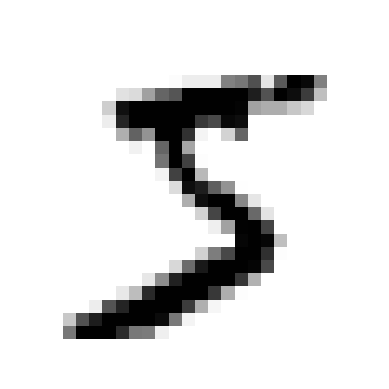

In [24]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [34]:
y[0]

np.int64(5)

In [33]:
import numpy as np
y = y.astype(int)

In [35]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [36]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

## Stochastic Gradient Descent (SGD)

In [37]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

## Train the model

In [38]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

## Predict

In [39]:
sgd_clf.predict([some_digit])

/Users/sharattadimalla/github/machine-learning/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

## Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

> Skewed datasets where the target class is infrequent than others, accuracy is not a good performance metric

## Confusion Matrix

In [41]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

## Precision

In [43]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

np.float64(0.8370879772350012)

## Recall

In [44]:
recall_score(y_train_5, y_train_pred)

np.float64(0.6511713705958311)

## F1-Score

In [45]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

np.float64(0.7325171197343847)

## ROC Curve

In [51]:
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

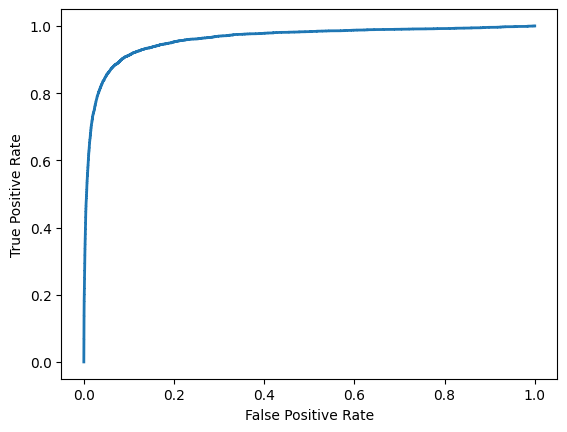

In [53]:
plt.plot(fpr, tpr, linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## AUC Score

In [54]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)